# Wordcount using Kafka

In [2]:
from confluent_kafka import Producer, Consumer
from confluent_kafka import SerializingProducer, DeserializingConsumer
from confluent_kafka.serialization import StringSerializer, StringDeserializer
from confluent_kafka.admin import AdminClient, NewTopic
from uuid import uuid4
import sys, lorem

brokers = "kafka1:9092,kafka2:9093"
topics = ["sentences", "words", "counts"]

In [56]:
new_topics = [NewTopic(topic, num_partitions=2, 
        replication_factor=1) for topic in topics]

In [57]:
fs = a = AdminClient({'bootstrap.servers': brokers}).create_topics(new_topics)

## Produce sentences

In [6]:
pconf = {
    'bootstrap.servers':brokers,
    'key.serializer': StringSerializer('utf_8'),
    'value.serializer': StringSerializer('utf_8')
}

In [81]:
p = SerializingProducer(pconf)

In [82]:
for n in range(1,100):
    try:
        # Produce line (without newline)
        line = lorem.sentence()
        p.produce(topics[0], key=str(uuid4()), value=line)
        p.poll(0)
        p.flush()
        print(line)
    except BufferError:
        sys.stderr.write('%% Local producer queue is full (%d messages awaiting delivery): try again\n' % len(p))

Non amet porro labore neque.
Amet adipisci dolore amet aliquam amet consectetur.
Neque ut neque porro non.
Quiquia dolore magnam eius.
Dolorem quiquia etincidunt magnam non.
Modi quiquia neque adipisci.
Ipsum modi ut neque.
Velit est velit est neque quiquia.
Neque dolorem velit amet quisquam quisquam.
Tempora etincidunt non quiquia magnam dolor dolore.
Sed amet dolore ipsum voluptatem.
Est neque quaerat aliquam eius.
Modi dolor dolorem quiquia quisquam.
Numquam quiquia est consectetur amet consectetur.
Est eius dolore ipsum.
Consectetur est quiquia dolore porro.
Etincidunt amet porro porro dolorem non eius.
Amet sit consectetur sed quiquia magnam neque.
Est adipisci consectetur adipisci magnam porro modi quiquia.
Numquam voluptatem adipisci est tempora non.
Etincidunt porro labore amet dolorem labore.
Modi modi dolore amet modi labore.
Eius dolore tempora modi quiquia adipisci numquam.
Amet non etincidunt dolore.
Non numquam labore labore modi voluptatem eius est.
Quaerat porro ut volu

## Consuming Sentences

In [3]:
string_deserializer = StringDeserializer('utf_8')

In [4]:
consumer_conf = {
    'bootstrap.servers': brokers,
    'key.deserializer': string_deserializer,
    'value.deserializer': string_deserializer,
    'group.id': str(uuid4()),
    'session.timeout.ms': 6000,
    'auto.offset.reset': 'earliest'}

In [92]:
c = DeserializingConsumer(consumer_conf)
c.subscribe([topics[0]])

In [93]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            print("{} [{}] at offset  {} with key  {}:  {}".format(msg.topic(), msg.partition(), msg.offset(), str(msg.key()), str(msg.value())))
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c.close()

sentences [0] at offset  0 with key  e3ba6bf1-8f1e-4a8c-9d54-63b62b4eaa51:  Non amet porro labore neque.
sentences [0] at offset  1 with key  22d8e31e-e811-45e8-91e8-7e407fe1e602:  Amet adipisci dolore amet aliquam amet consectetur.
sentences [0] at offset  2 with key  1fc24fad-0f7b-416f-9654-6f2a6679aa8e:  Neque ut neque porro non.
sentences [0] at offset  3 with key  e54febf1-b851-4606-a88f-af24ab80067d:  Quiquia dolore magnam eius.
sentences [0] at offset  4 with key  e73b06f0-87e8-41b7-b6bc-9f1e8f43e166:  Dolorem quiquia etincidunt magnam non.
sentences [0] at offset  5 with key  631c40d7-e56f-40bc-bfdb-faaf38c80239:  Modi quiquia neque adipisci.
sentences [0] at offset  6 with key  f4d20d10-3772-416a-9644-4b19c781817d:  Ipsum modi ut neque.
sentences [0] at offset  7 with key  6914e697-5906-4abe-857f-b9a5b9f59249:  Velit est velit est neque quiquia.
sentences [0] at offset  8 with key  80fc91db-795f-4248-ae6f-a55d0109b49f:  Neque dolorem velit amet quisquam quisquam.
sentences [0]

%% Aborted by user


## Consuming Sentences and Producing Words

In [7]:
consumer_conf['group.id'] = str(uuid4())
c2 = DeserializingConsumer(consumer_conf)
c2.subscribe([topics[0]])
p2 = SerializingProducer(pconf)

In [8]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c2.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            for w in msg.value().split(" "):
                print(w)
                p2.produce(topics[1], key=msg.key(), value=w)
                p2.poll(0)
                p2.flush()
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c2.close()

Non
amet
porro
labore
neque.
Amet
adipisci
dolore
amet
aliquam
amet
consectetur.
Neque
ut
neque
porro
non.
Quiquia
dolore
magnam
eius.
Dolorem
quiquia
etincidunt
magnam
non.
Modi
quiquia
neque
adipisci.
Ipsum
modi
ut
neque.
Velit
est
velit
est
neque
quiquia.
Neque
dolorem
velit
amet
quisquam
quisquam.
Tempora
etincidunt
non
quiquia
magnam
dolor
dolore.
Sed
amet
dolore
ipsum
voluptatem.
Est
neque
quaerat
aliquam
eius.
Modi
dolor
dolorem
quiquia
quisquam.
Numquam
quiquia
est
consectetur
amet
consectetur.
Est
eius
dolore
ipsum.
Consectetur
est
quiquia
dolore
porro.
Etincidunt
amet
porro
porro
dolorem
non
eius.
Amet
sit
consectetur
sed
quiquia
magnam
neque.
Est
adipisci
consectetur
adipisci
magnam
porro
modi
quiquia.
Numquam
voluptatem
adipisci
est
tempora
non.
Etincidunt
porro
labore
amet
dolorem
labore.
Modi
modi
dolore
amet
modi
labore.
Eius
dolore
tempora
modi
quiquia
adipisci
numquam.
Amet
non
etincidunt
dolore.
Non
numquam
labore
labore
modi
voluptatem
eius
est.
Quaerat
porro
ut
volu

%% Aborted by user


NameError: name 'c' is not defined

## Counting Words

In [15]:
consumer_conf['group.id'] = str(uuid4())
words = {}

In [16]:
c3 = DeserializingConsumer(consumer_conf)
c3.subscribe([topics[1]])

In [17]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c3.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            w = str(msg.value())
            if w in words:
                words[w] = words[w]+1
            else:
                words[w] = 0
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c3.close()

%% Aborted by user


In [18]:
words

{'Non': 5,
 'amet': 17,
 'porro': 25,
 'labore': 15,
 'neque.': 5,
 'Amet': 3,
 'adipisci': 17,
 'dolore': 18,
 'aliquam': 9,
 'consectetur.': 3,
 'Neque': 2,
 'ut': 16,
 'neque': 18,
 'non.': 5,
 'Quiquia': 4,
 'magnam': 12,
 'eius.': 4,
 'Dolorem': 2,
 'quiquia': 14,
 'etincidunt': 17,
 'Modi': 4,
 'adipisci.': 0,
 'Ipsum': 6,
 'modi': 9,
 'Velit': 3,
 'est': 10,
 'velit': 11,
 'quiquia.': 1,
 'dolorem': 12,
 'quisquam': 12,
 'quisquam.': 4,
 'Tempora': 1,
 'non': 13,
 'dolor': 14,
 'dolore.': 5,
 'Sed': 2,
 'ipsum': 15,
 'voluptatem.': 3,
 'Est': 6,
 'quaerat': 8,
 'Numquam': 7,
 'consectetur': 12,
 'eius': 13,
 'ipsum.': 3,
 'Consectetur': 1,
 'porro.': 2,
 'Etincidunt': 1,
 'sit': 11,
 'sed': 15,
 'voluptatem': 11,
 'tempora': 14,
 'labore.': 4,
 'Eius': 3,
 'numquam.': 4,
 'numquam': 15,
 'est.': 1,
 'Quaerat': 0,
 'tempora.': 3,
 'Dolor': 4,
 'sit.': 4,
 'magnam.': 2,
 'Adipisci': 3,
 'sed.': 1,
 'Ut': 4,
 'dolor.': 2,
 'Porro': 3,
 'Quisquam': 0,
 'aliquam.': 4,
 'Dolore': 1,
 

In [19]:
import numpy as np
import matplotlib.pyplot as plt


<BarContainer object of 81 artists>

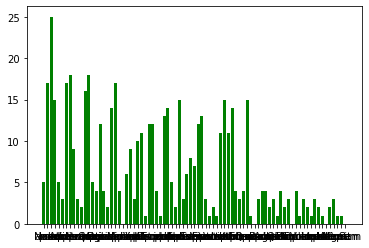

In [21]:
plt.bar(words.keys(), words.values(), color='g')